# Lab 7.05 - Time series analysis

In [1]:
# Package imports

import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

### Exercise 5 - Alcoholic beverages sales

The file US Retail.csv contains monthly retail sales of beer, wine, and liquor at U.S. liquor stores.

- Is seasonality present in these data?
- Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?
- Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
- Create and train the model. 
- Predict the values for 2009.
- Create a plot with the train data, the fitted values, the test data and the predicted values.
- Calculate MAE

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/US%20Retail.csv', delimiter = ";", parse_dates=['Month']).set_index(['Month'])
data.head()

,Total Sales
Month,
1992-01-01,1519
1992-02-01,1551
1992-03-01,1606
1992-04-01,1686
1992-05-01,1834


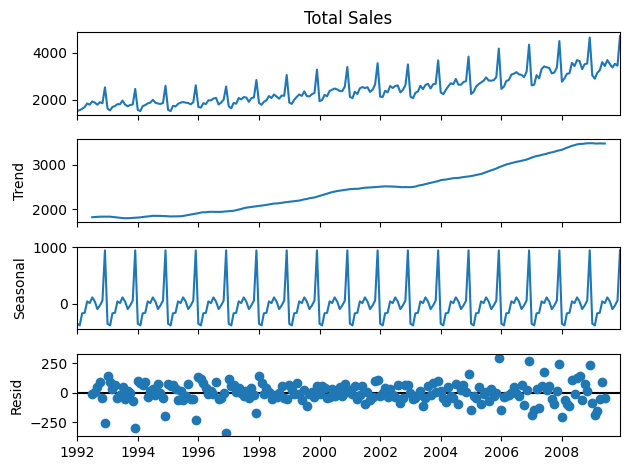

In [4]:
# - Is seasonality present in these data?
result = seasonal_decompose(data['Total Sales'], model='additive', period=12)
result.plot()
plt.show()


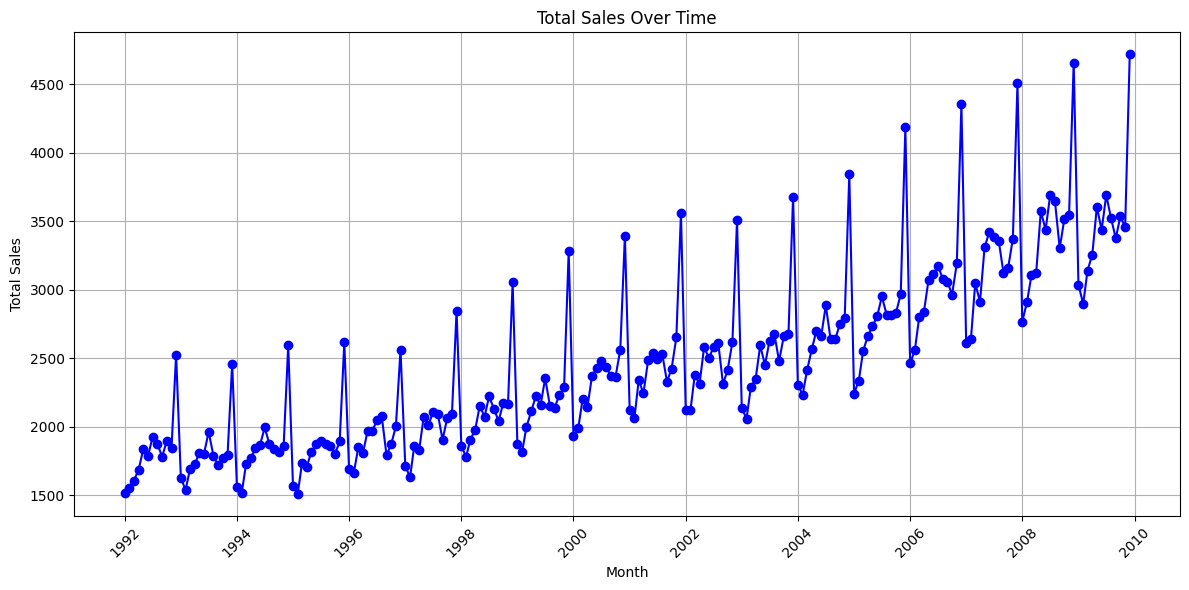

In [6]:
# - Create a time series chart of the data. Based on what you see, which of the exponential smoothing models do you think should be used for forecasting? Why?


# Total Sales
# Month	
# 1992-01-01	1519
# 1992-02-01	1551
# 1992-03-01	1606
# 1992-04-01	1686
# 1992-05-01	1834


plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Total Sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()
# Based on the time series chart, it appears that there is a clear trend and seasonality in the data. The sales figures show an upward trend over time, with periodic fluctuations that suggest seasonal patterns. Given this observation, an appropriate model for forecasting would be the Holt-Winters Exponential Smoothing model, which can capture both trend and seasonality in the data.

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


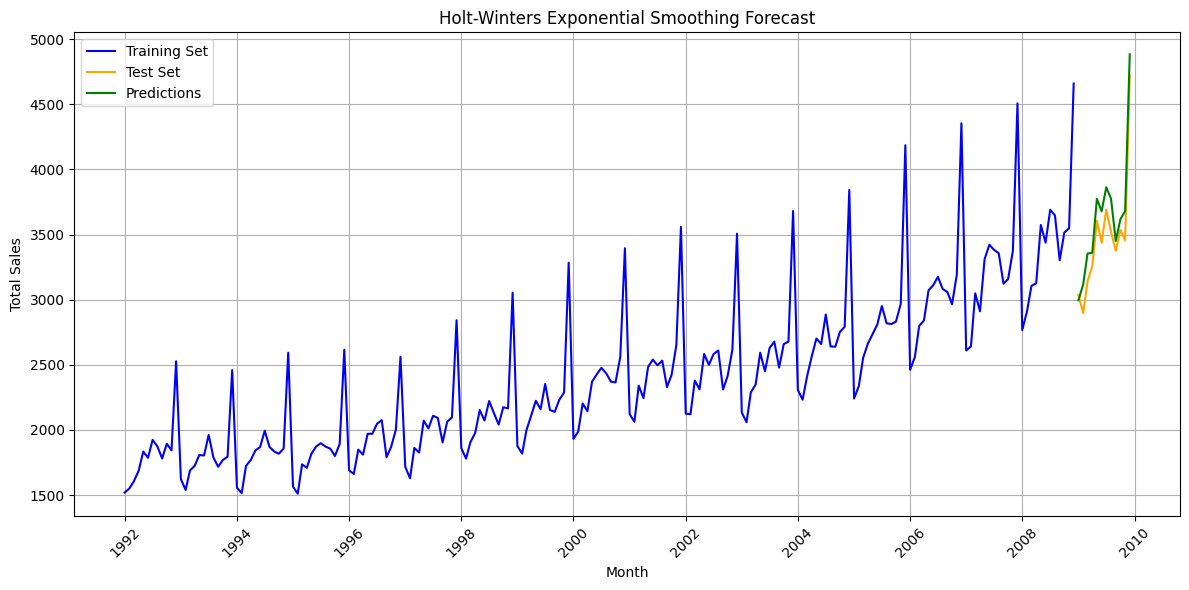

In [ ]:
# - Split the dataset in a train (1992-01-01 up to and including 2008-12-01) and test set (2009-01-01 up to and including 2009-12-01)  
train = data[:'2008-12-01']
test = data['2009-01-01':]
# - Create and train the model. 

# The Holt-Winters Exponential Smoothing model is suitable for this data as it can handle both trend and seasonality.
model = ExponentialSmoothing(train['Total Sales'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()
# - Make predictions for the test set
predictions = fit_model.forecast(steps=len(test))
# - Plot the training set, test set, and predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total Sales'], label='Training Set', color='blue')
plt.plot(test.index, test['Total Sales'], label='Test Set', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.title('Holt-Winters Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


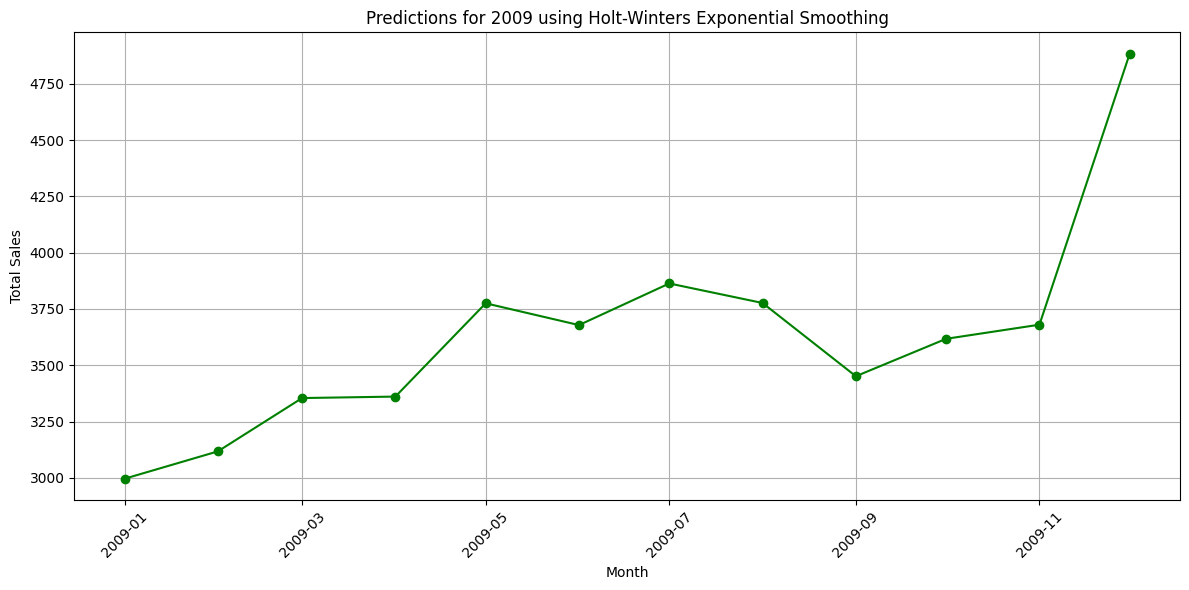

In [8]:
# - Predict the values for 2009.
predictions_2009 = fit_model.forecast(steps=12)
# - Plot the predictions for 2009
plt.figure(figsize=(12, 6))
plt.plot(predictions_2009.index, predictions_2009, marker='o', linestyle='-', color='green')
plt.title('Predictions for 2009 using Holt-Winters Exponential Smoothing')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


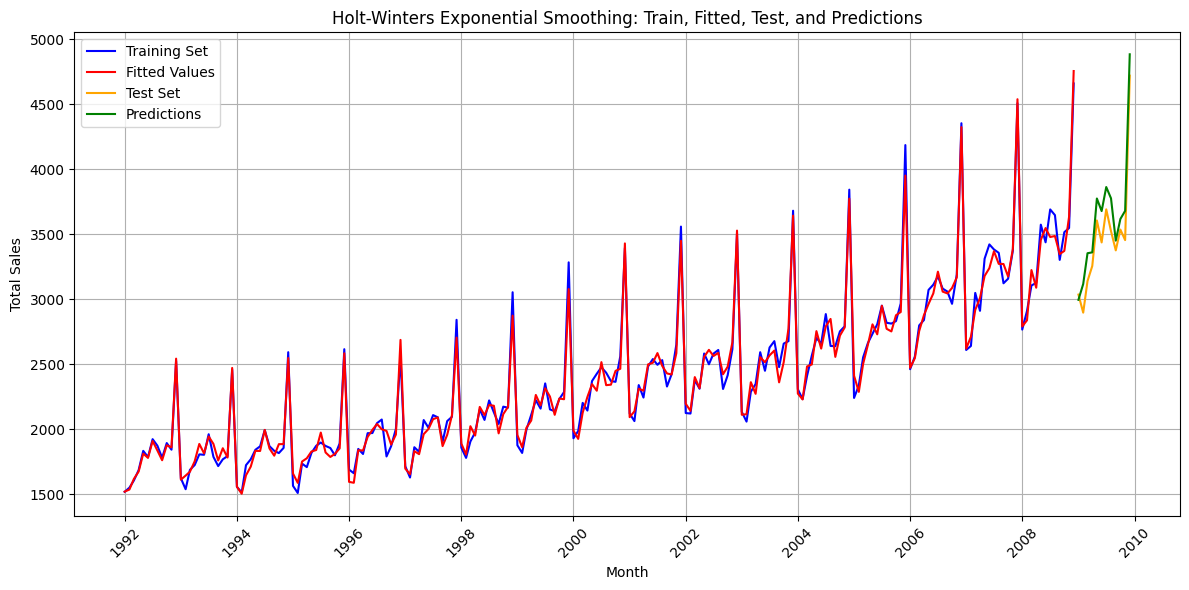

In [9]:
# - Create a plot with the train data, the fitted values, the test data and the predicted values.
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Total Sales'], label='Training Set', color='blue')
plt.plot(train.index, fit_model.fittedvalues, label='Fitted Values', color='red')
plt.plot(test.index, test['Total Sales'], label='Test Set', color='orange')
plt.plot(test.index, predictions, label='Predictions', color='green')
plt.title('Holt-Winters Exponential Smoothing: Train, Fitted, Test, and Predictions')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()



In [10]:
# - Calculate MAE
mae = mean_absolute_error(test['Total Sales'], predictions)
print(f'Mean Absolute Error (MAE): {mae:.2f}')
# - Calculate RMSE
rmse = np.sqrt(mean_squared_error(test['Total Sales'], predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 163.31
Root Mean Squared Error (RMSE): 177.24


## Source
Business Analytics Data Analysis & Decision Making 